Installing Pdfplumber to Extract table from pdf file


In [26]:
!pip install pdfplumber

# **Exploratory Data Analysis (EDA) for MALIK Financial Services (MFS)**

## **1. Importing Necessary Libraries**

In [3]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization
import pdfplumber  # For extracting tables from PDFs

## **2. Extracting Tables from PDF**
This function reads a PDF file, extracts tabular data from each page, and converts it into a pandas DataFrame. The first row is used as column headers.

In [4]:
def extract_pdf_table(pdf_path):
    """
    Extracts tabular data from a PDF file and converts it into a pandas DataFrame.

    Parameters:
        pdf_path (str): The file path of the PDF document.

    Returns:
        pd.DataFrame: A DataFrame containing the extracted table data.
    """
    with pdfplumber.open(pdf_path) as pdf:  # Open the PDF file
        table_data = []  # Initialize an empty list to store table data

        for page in pdf.pages:  # Iterate through each page in the PDF
            table = page.extract_table()  # Extract the table from the page
            if table:  # Check if a table exists on the page
                table_data.extend(table)  # Append extracted table rows to the list

    # Convert the extracted data into a pandas DataFrame
    # Use the first row as column headers and the rest as data
    return pd.DataFrame(table_data[1:], columns=table_data[0])


## **4. Loading Data from an Excel File**
This function loads data from an Excel file into a pandas DataFrame.

In [5]:
def load_excel_data(excel_path):
    """
    Loads data from an Excel file into a pandas DataFrame.

    Parameters:
        excel_path (str): The file path of the Excel document.

    Returns:
        pd.DataFrame: A DataFrame containing the loaded Excel data.
    """
    return pd.read_excel(excel_path)  # Read and return data from the Excel file


## **5. Mounting Drive and File Paths of Excel and Pdf File**
This function stores data in paths from the excel and pdf files.

In [25]:
from google.colab import drive
drive.mount('/content/drive')
# File Paths
pdf_path = "/content/drive/MyDrive/MALIK_Loans_Database_Table (1).pdf"
excel_path = "/content/drive/MyDrive/MALIK Loan Data (1) (1).xlsx"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **6. Pdf Extraction and Basic Data Wrangling**
The data from pdf file is extracted, then shape of date, data types, null values and duplicate values are checked.

In [11]:
# Extracts the table data from the given PDF file
pdf_df = extract_pdf_table(pdf_path)

# Display the shape (rows, columns) of the extracted PDF DataFrame
display("Shape of Pdf File", pdf_df.shape)

# Display the data types of each column in the extracted DataFrame
display("Datatype of Pdf File", pdf_df.dtypes)

# Check for missing (null) values in each column of the DataFrame
display("Null Values in Pdf File", pdf_df.isnull().sum())

# Check for duplicate rows in the DataFrame
display("Duplication in Pdf File", pdf_df.duplicated().sum())


'Shape of Pdf File'

(398, 13)

'Datatype of Pdf File'

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Graduate,object
Self_Employed,object
ApplicantIncome,object
CoapplicantIncome,object
LoanAmount,object
Loan_Amount_Term,object


'Null Values in Pdf File'

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Graduate,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


'Duplication in Pdf File'

np.int64(0)

## **7. Load Excel dataframe and Basic Data Wrangling**
The data from pdf file is loaded , then shape of date, data types, null values and duplicate values are checked.There were dupliate values which are removed.

In [12]:
# Load the Excel data into a pandas DataFrame
excel_df = load_excel_data(excel_path)

# Display the shape (number of rows and columns) of the DataFrame
display("Shape of Excel File", excel_df.shape)

# Display the data types of each column
display("Datatype of Excel File", excel_df.dtypes)

# Check and display the count of missing values in each column
display("Null Values in Excel File", excel_df.isnull().sum())

# Check and display the number of duplicate rows in the dataset
display("Duplication in Excel File", excel_df.duplicated().sum())

# Remove duplicate rows from the DataFrame
excel_df = excel_df.drop_duplicates()

# Verify if duplicates have been removed successfully
display("Duplication in Excel File", excel_df.duplicated().sum())


'Shape of Excel File'

(249, 13)

'Datatype of Excel File'

,0
Loan_ID,int64
Gender,int64
Married,int64
Dependents,int64
Graduate,int64
Self_Employed,int64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,int64
Loan_Amount_Term,int64


'Null Values in Excel File'

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Graduate,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


'Duplication in Excel File'

np.int64(2)

'Duplication in Excel File'

np.int64(0)

## **7. Merge data from Excel and Pdf as a Single Dataframe and Basic Data Wrangling**
The data from pdf and excel file are merged, then shape of date, data types, null values and duplicate values are checked.

In [13]:
# Merging Data from PDF and Excel Sources

# Merge the two DataFrames (pdf_df and excel_df) by concatenation
# ignore_index=True ensures that the index is reset in the merged DataFrame
merged_df = pd.concat([pdf_df, excel_df], ignore_index=True)

# Display the shape (number of rows and columns) of the merged DataFrame
display("Shape of Merged DataFrame", merged_df.shape)

# Display the data types of each column in the merged DataFrame
display("Datatype of Merged DataFrame", merged_df.dtypes)

# Check and display the count of missing values in each column
display("Null Values in Merged DataFrame", merged_df.isnull().sum())

# Check and display the number of duplicate rows in the merged DataFrame
display("Duplication in Merged DataFrame", merged_df.duplicated().sum())


'Shape of Merged DataFrame'

(645, 13)

'Datatype of Merged DataFrame'

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Graduate,object
Self_Employed,object
ApplicantIncome,object
CoapplicantIncome,object
LoanAmount,object
Loan_Amount_Term,object


'Null Values in Merged DataFrame'

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Graduate,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


'Duplication in Merged DataFrame'

np.int64(0)

# **8. Convert Selected Columns to Numeric Data Type**
This code converts specific columns (`LoanAmount`, `ApplicantIncome`, `CoapplicantIncome`, `Loan_Amount_Term`) to numeric format, replacing non-numeric values with `NaN` to ensure data consistency for analysis.

In [14]:
# Iterate over the specified columns to convert them to numeric values
for col in ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# **9. Convert Categorical Integers into Meaningful Labels**

In [15]:
# Replace numeric gender codes with descriptive labels: 1 as male and 2 as female
merged_df['Gender'] = merged_df['Gender'].map({1: 'Male', 2: 'Female'})

# Replace numeric marital status codes with descriptive labels: 0 as single and 1 as married
merged_df['Married'] = merged_df['Married'].map({0: 'Single', 1: 'Married'})

# Replace numeric education status codes with descriptive labels: 0 as no and 1 as yes
merged_df['Graduate'] = merged_df['Graduate'].map({0: 'No', 1: 'Yes'})

# Replace numeric self-employment status codes with descriptive labels: 0 as no and 1 as yes
merged_df['Self_Employed'] = merged_df['Self_Employed'].map({0: 'No', 1: 'Yes'})

# Replace numeric credit history codes with descriptive labels: 0 as no and 1 as yes
merged_df['Credit_History'] = merged_df['Credit_History'].map({0: 'No', 1: 'Yes'})

# Replace numeric property area codes with descriptive labels: 1 as urban, 2 as semiurban and 3 as rural
merged_df['Property_Area'] = merged_df['Property_Area'].map({1: 'Urban', 2: 'Semiurban', 3: 'Rural'})

# Replace loan status codes with descriptive labels: y as yes and n as no
merged_df['Loan_Status'] = merged_df['Loan_Status'].map({'Y': 'Yes', 'N': 'No'})


# **10. Descriptive Statistics: Loan Analysis**
- Total Loaned Amount
- Average Loan Amount
- Average Loab Term in months

In [16]:
# sum() computes the total amount of loans granted.
total_loaned = merged_df['LoanAmount'].sum()

# mean() calculates the average loan amoun
avg_loaned = merged_df['LoanAmount'].mean()

# mean() calculates the average loan repayment term.
avg_term = merged_df['Loan_Amount_Term'].mean()


# Display the total amount loaned, average loan with £ sign and average term as months
print(f'Total Loaned Amount: £{total_loaned:,}')
print(f'Average Loan Amount: £{avg_loaned:.2f}')
print(f'Average Loan Term: {avg_term} months')

Total Loaned Amount: £95,557
Average Loan Amount: £148.15
Average Loan Term: 334.83720930232556 months


## **11. Visualizing Loan Approval Breakdown by Gender**
This visualization helps analyze the **loan approval status** across different genders. A count plot is used to compare the number of approved and rejected loan applications for **males and females**.



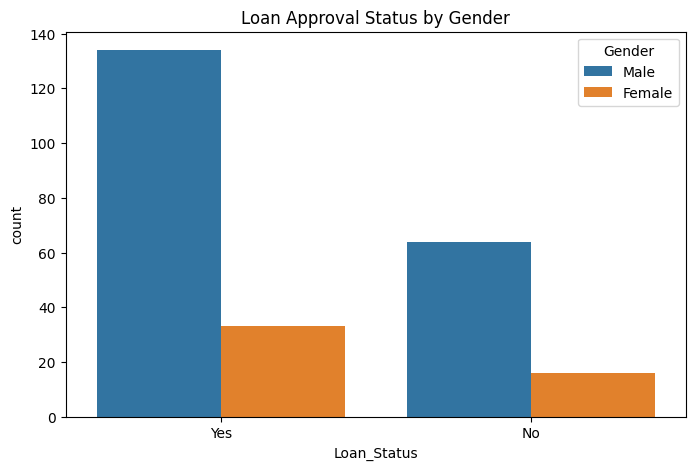

In [17]:
plt.figure(figsize=(8, 5))  # Set the figure size for better readability

# Create a count plot to show loan approval status by gender
sns.countplot(data=merged_df, x='Loan_Status', hue='Gender')

# x=Loan_Status: Displays loan approval ('Yes') and rejection ('No') counts on the x-axis.
# hue=Gender: Groups data by gender (Male/Female) using different colors.

# Add a title to the plot
plt.title('Loan Approval Status by Gender')

# Display the plot
plt.show()

# **12. Maximum and Minimum Loan Amount Analysis**
- Maxinum Amount of Loan
- Minimum Amount of Loan

In [18]:
# max() returns the highest loan amount
max_loan = merged_df['LoanAmount'].max()

# min() returns the lowest loan amount
min_loan = merged_df['LoanAmount'].min()

# display the highest and lowest amount with £ sign
print(f'Max Loan Amount: £{max_loan:,}')
print(f'Min Loan Amount: £{min_loan:,}')


Max Loan Amount: £700
Min Loan Amount: £9


## **13. Loan Amount Distribution (Box Plot)**
This visualization provides insights into the **distribution of loan amounts** using a **box plot**.

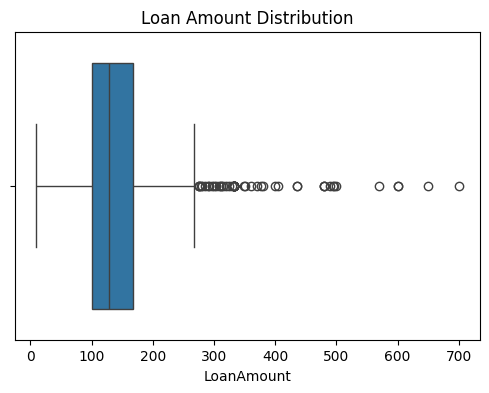

In [19]:
plt.figure(figsize=(6, 4))  # Set the figure size for better readability

# Create a box plot for Loan Amount distribution
sns.boxplot(data=merged_df, x='LoanAmount')

# data=merged_df: Uses the merged DataFrame as the data source.
# x='LoanAmount': Displays the distribution of loan amounts along the x-axis.
# A box plot is useful for detecting outliers and visualizing data spread.

# Add a title to the plot
plt.title('Loan Amount Distribution')

# Display the plot
plt.show()

## **14. Percentage of Self-Employed Loan Approvals**
This calculation determines the **percentage of approved loans** that were given to **self-employed individuals**.



In [20]:
# Count the number of approved loans for self-employed individuals

# Filters the dataframe where self employed == yes  and loan_status == yes, shape[0] to count numbers of such loans
self_emp_approved = merged_df[(merged_df['Self_Employed'] == 'Yes') & (merged_df['Loan_Status'] == 'Yes')].shape[0]

# filters the dataframe where loan_status == yes ,shape[0] to count numbers of such loans
total_approved = merged_df[merged_df['Loan_Status'] == 'Yes'].shape[0]

# Divides the number of approved loans for self-employed individuals by the total approved loans and multiply by 100 for percantage.
self_emp_percentage = (self_emp_approved / total_approved) * 100

# display the Self-Employed Loan Approval Percentage
print(f'Self-Employed Loan Approval Percentage: {self_emp_percentage:.2f}%')

Self-Employed Loan Approval Percentage: 5.18%


## **Optional: Income Distribution Analysis (Mean & Standard Deviation)**
This code computes and displays the **average income** and **income variability** of loan applicants.



In [21]:
# mean() computes the average applicant income
income_mean = merged_df['ApplicantIncome'].mean()

# std() calculates the standard deviation of applicant income
income_std = merged_df['ApplicantIncome'].std()

# display the mean and standered deviation of aplicant income
print(f"Average Applicant Income: £{income_mean:.2f}")
print(f"Standard Deviation of Applicant Income: £{income_std:.2f}")

Average Applicant Income: £5365.59
Standard Deviation of Applicant Income: £6021.94


## **Optional: Income Distribution of Main Applicants (Histogram)**
This visualization shows the **distribution of applicant incomes** using a **histogram with KDE (Kernel Density Estimation)**.

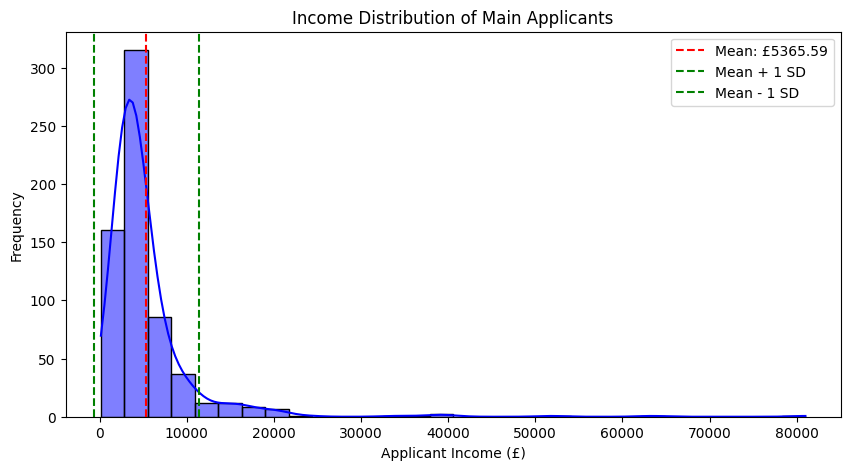

In [22]:
plt.figure(figsize=(10, 5)) # Set the figure size for better readability

# Create a histogram of applicant income with KDE (Kernel Density Estimation)

# bins = 30 : Divides income values into 30 bins for better granularity.
# kde=True: Adds a smooth Kernel Density Estimate (KDE) curve.
# color='blue': Sets the histogram color to blue
sns.histplot(merged_df['ApplicantIncome'], bins=30, kde=True, color='blue')

# Draws a red dashed line at the mean income value
plt.axvline(income_mean, color='red', linestyle='dashed', label=f"Mean: £{income_mean:.2f}")

# Add vertical dashed lines for ±1 standard deviation
# Green dashed lines mark one standard deviation above and below the mean
plt.axvline(income_mean + income_std, color='green', linestyle='dashed', label=f"Mean + 1 SD")
plt.axvline(income_mean - income_std, color='green', linestyle='dashed', label=f"Mean - 1 SD")

# Label the X-axis (Applicant Income in £)
plt.xlabel("Applicant Income (£)")

# Label the Y-axis (Frequency of Applicants)
plt.ylabel("Frequency")

# Add a title for better context
plt.title("Income Distribution of Main Applicants")

# Add a legend to explain the statistical markers
plt.legend()

# Display the histogram plot
plt.show()

## **Optional: Top 10 Applicants by Loan Amount**
This code extracts and displays the **top 10 applicants** who received the **largest loan amounts**.



In [23]:
# nlargest(10, 'LoanAmount'): Selects the top 10 rows with the highest loan amounts.
# [['Loan_ID', 'ApplicantIncome', 'LoanAmount'] ]: Retains only relevant columns:
top_10_loans = merged_df.nlargest(10, 'LoanAmount')[['Loan_ID', 'ApplicantIncome', 'LoanAmount']]

# display the banner
print("Top 10 Applicants by Loan Amount:")

# display the top 10 aplicant list
print(top_10_loans)

Top 10 Applicants by Loan Amount:
    Loan_ID  ApplicantIncome  LoanAmount
171    1585            51763         700
130    1469            20166         650
155    1536            39999         600
592    2813            19484         600
369    2191            19730         570
518    2547            18333         500
635    2959            12000         496
177    1610             5516         495
333    2101            63337         490
308    1996            20233         480


## **Optional: Property Area Distribution of Loan Applicants**
This visualization represents the **distribution of loan applicants** across different **property areas** (Urban, Semiurban, Rural).



<ipython-input-24-e5861c47aec8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Property_Area', data=merged_df, palette="Set2")


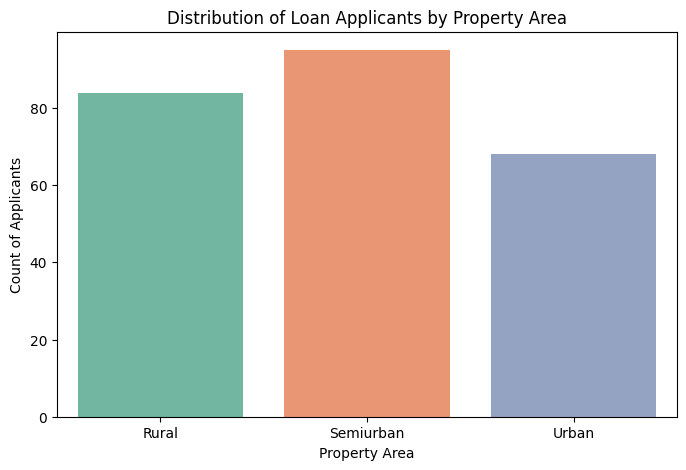

In [24]:
plt.figure(figsize=(8, 5)) # Set figure size for better readability

# Create a count plot for the 'Property_Area' column
sns.countplot(x='Property_Area', data=merged_df, palette="Set2")
# x='Property_Area'`: Sets the X-axis as Property Area (Urban, Semiurban, Rural).
# data=merged_df: Uses the merged dataset containing loan applicants.
# palette="Set2": Applies a visually appealing color scheme for differentiation.

# Label the X-axis (Property Area)
plt.xlabel("Property Area")

# Label the Y-axis (Count of Applicants)
plt.ylabel("Count of Applicants")


# Add a title for better context
plt.title("Distribution of Loan Applicants by Property Area")

# Display the plot
plt.show()